In [1]:
# For data manipulation and analysis
import pandas as pd
import numpy as np

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For date-time manipulation
import datetime

# For basic statistics
from scipy import stats

# Optional (for handling large datasets)
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('C:\\Users\\GNANASEKARAN\\OneDrive\\Documents\\Python Project\\dataset_group.csv') 

In [3]:
# Display the first few rows of the dataset
data.head()

,Date,Order_id,Product
0,01-01-2018,1,yogurt
1,01-01-2018,1,pork
2,01-01-2018,1,sandwich bags
3,01-01-2018,1,lunch meat
4,01-01-2018,1,all- purpose


In [4]:
# Display the last few rows of the dataset
data.tail()

,Date,Order_id,Product
20636,25-02-2020,1138,soda
20637,25-02-2020,1138,paper towels
20638,26-02-2020,1139,soda
20639,26-02-2020,1139,laundry detergent
20640,26-02-2020,1139,shampoo


In [5]:
# Get the shape (number of rows and columns)
data.shape

(20641, 3)

In [6]:
# Get basic info (data types, non-null counts)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20641 entries, 0 to 20640
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      20641 non-null  object
 1   Order_id  20641 non-null  int64 
 2   Product   20641 non-null  object
dtypes: int64(1), object(2)
memory usage: 483.9+ KB


In [7]:
# Check for missing values in each column
data.isnull().sum()

Date        0
Order_id    0
Product     0
dtype: int64

In [8]:
# Check for duplicate rows
data.duplicated().sum()

4730

In [9]:
# Get statistical summary of numerical columns
data.describe()

,Order_id
count,20641.000000
mean,575.986289
std,328.557078
min,1.000000
25%,292.000000
50%,581.000000
75%,862.000000
max,1139.000000


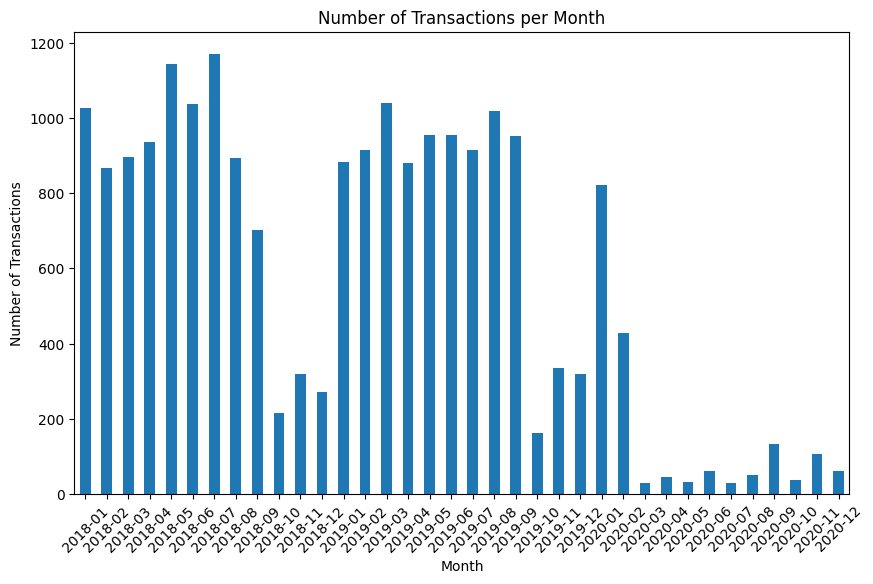

In [10]:
#Univariate analysis
# Convert 'Date' column to datetime format if it's not already
data['Date'] = pd.to_datetime(data['Date'])

# Plot the distribution of transactions over time
plt.figure(figsize=(10, 6))
data['Date'].dt.to_period('M').value_counts().sort_index().plot(kind='bar')
plt.title('Number of Transactions per Month')
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.show()

Number of unique orders: 1139


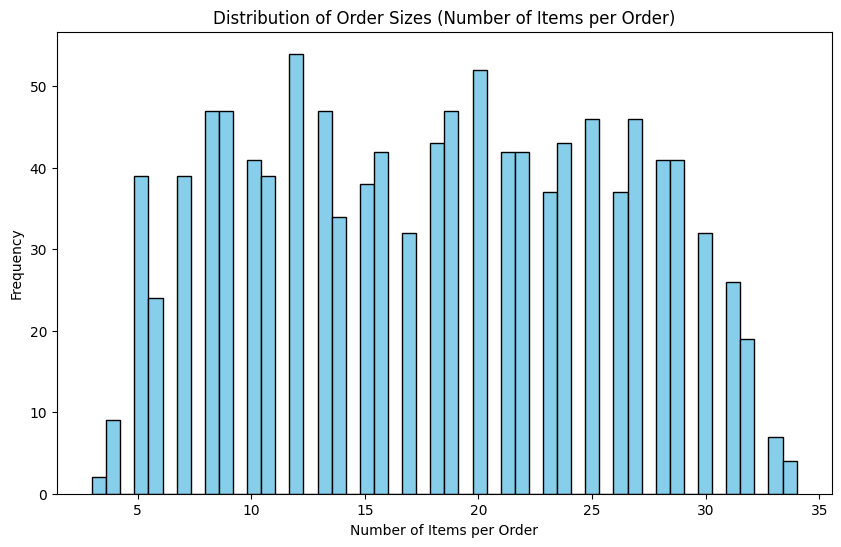

In [11]:
# Check how many unique orders exist
unique_orders = data['Order_id'].nunique()
print(f"Number of unique orders: {unique_orders}")

# Distribution of order counts per customer (if applicable)
order_counts = data.groupby('Order_id').size()
plt.figure(figsize=(10, 6))
order_counts.plot(kind='hist', bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Order Sizes (Number of Items per Order)')
plt.xlabel('Number of Items per Order')
plt.ylabel('Frequency')
plt.show()

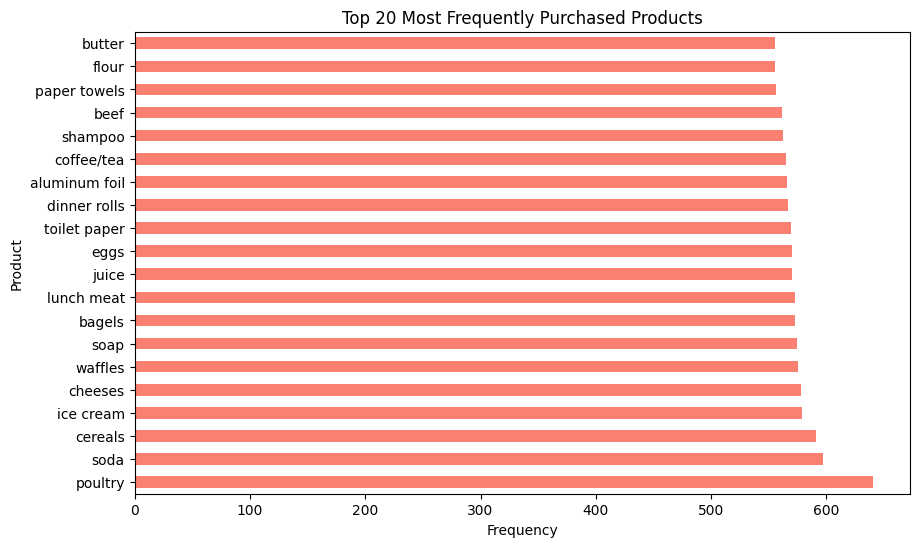

In [12]:
# Frequency distribution of products
product_counts = data['Product'].value_counts().head(20)  # Top 20 products
product_counts.plot(kind='barh', figsize=(10, 6), color='salmon')
plt.title('Top 20 Most Frequently Purchased Products')
plt.xlabel('Frequency')
plt.ylabel('Product')
plt.show()

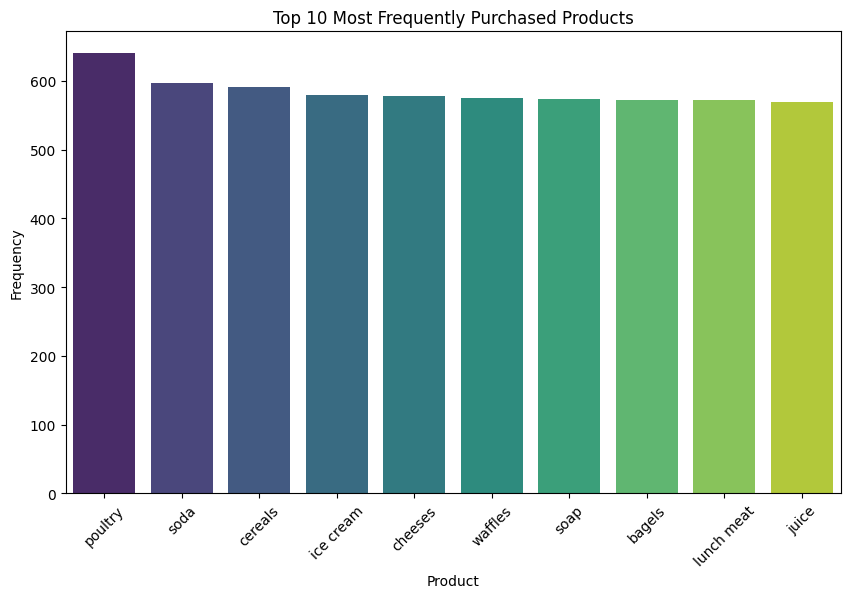

In [13]:
#Bivariate analysis
# Count the number of occurrences of each product
product_frequency = data['Product'].value_counts().reset_index()
product_frequency.columns = ['Product', 'Frequency']

# Plot the top 10 most frequently purchased products
plt.figure(figsize=(10, 6))
sns.barplot(data=product_frequency.head(10), x='Product', y='Frequency', palette='viridis')
plt.title('Top 10 Most Frequently Purchased Products')
plt.xlabel('Product')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

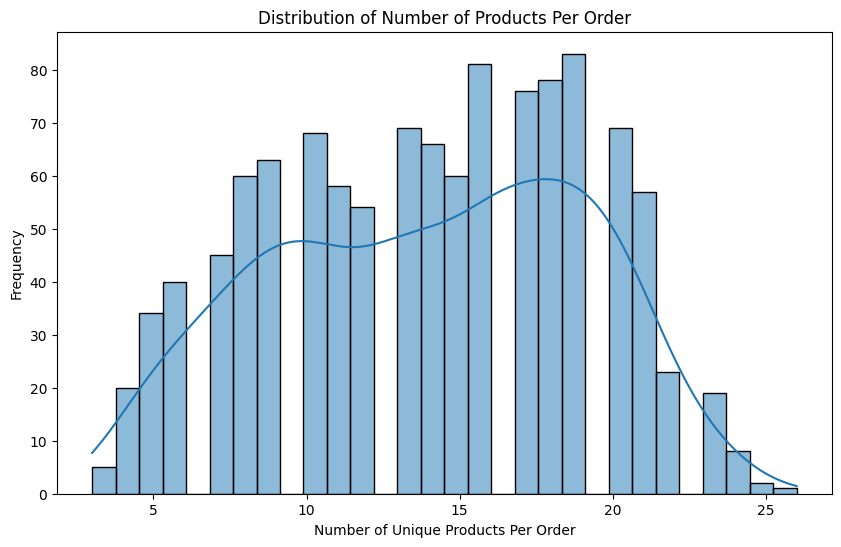

In [14]:
# Group by Order_id and count the unique products
products_per_order = data.groupby('Order_id')['Product'].nunique().reset_index()

# Plot the distribution of the number of unique products per order
plt.figure(figsize=(10, 6))
sns.histplot(products_per_order['Product'], bins=30, kde=True)
plt.title('Distribution of Number of Products Per Order')
plt.xlabel('Number of Unique Products Per Order')
plt.ylabel('Frequency')
plt.show()

In [15]:
# Create a pivot table of products in each order (for association analysis later)
order_product_matrix = data.groupby(['Order_id', 'Product']).size().unstack(fill_value=0)

# perform an analysis like market basket analysis, or simply see the co-occurrence
print(order_product_matrix.head())

Product   all- purpose  aluminum foil  bagels  beef  butter  cereals  cheeses  \
Order_id                                                                        
1                    3              1       0     1       1        0        0   
2                    0              1       0     0       0        1        1   
3                    0              0       1     0       0        1        1   
4                    1              0       0     0       0        1        0   
5                    1              0       0     0       0        0        0   

Product   coffee/tea  dinner rolls  dishwashing liquid/detergent  ...  \
Order_id                                                          ...   
1                  0             2                             0  ...   
2                  0             0                             1  ...   
3                  0             1                             0  ...   
4                  0             0                             0  .

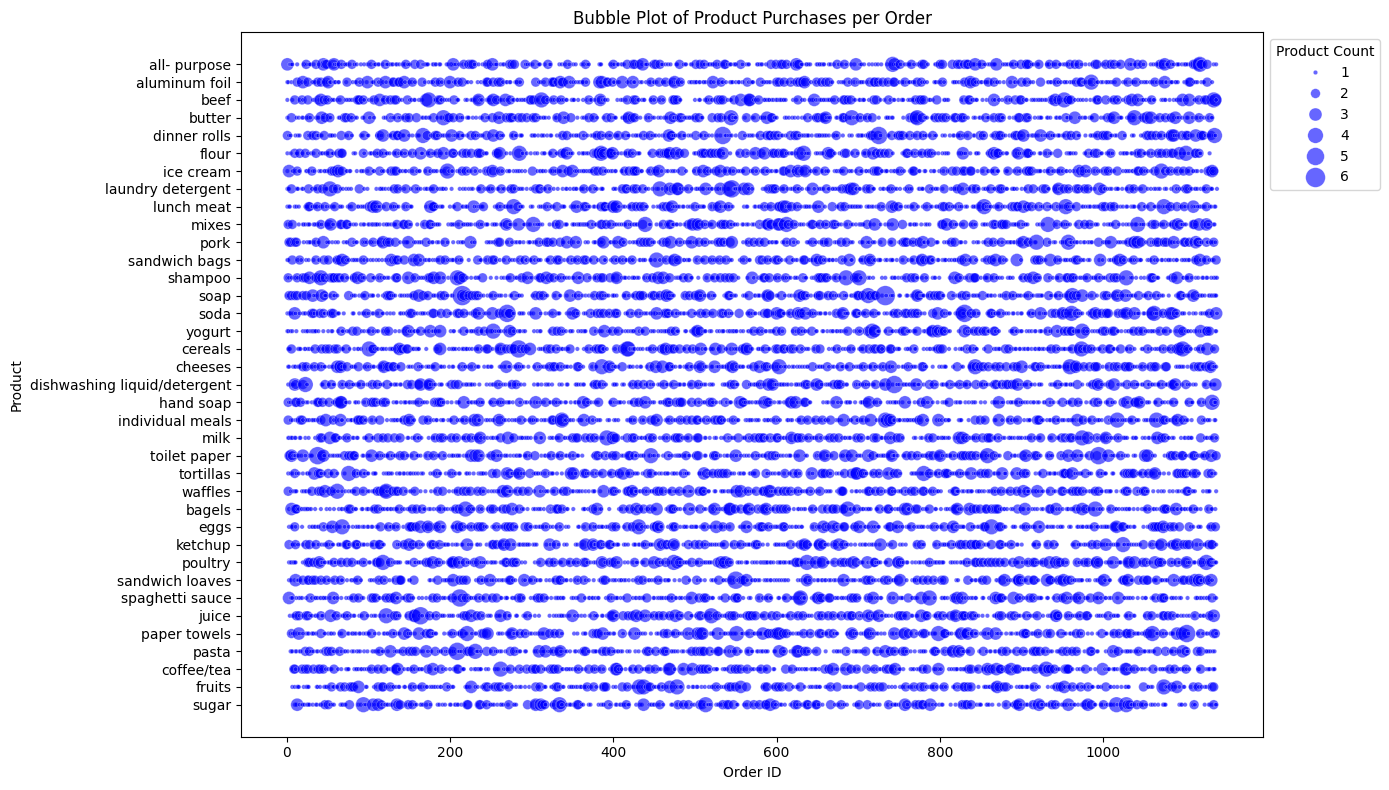

In [16]:
# Multivariate Analysis
# Count the occurrences of each product in each order
product_counts = data.groupby(['Order_id', 'Product']).size().reset_index(name='Product_Count')

# Create a bubble plot with 'Order_id' on the x-axis, 'Product' on the y-axis, and 'Product_Count' as the size
plt.figure(figsize=(14, 8))
sns.scatterplot(data=product_counts, x='Order_id', y='Product', size='Product_Count', sizes=(10, 200), color='blue', alpha=0.6)
plt.title('Bubble Plot of Product Purchases per Order')
plt.xlabel('Order ID')
plt.ylabel('Product')
plt.legend(title='Product Count', loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

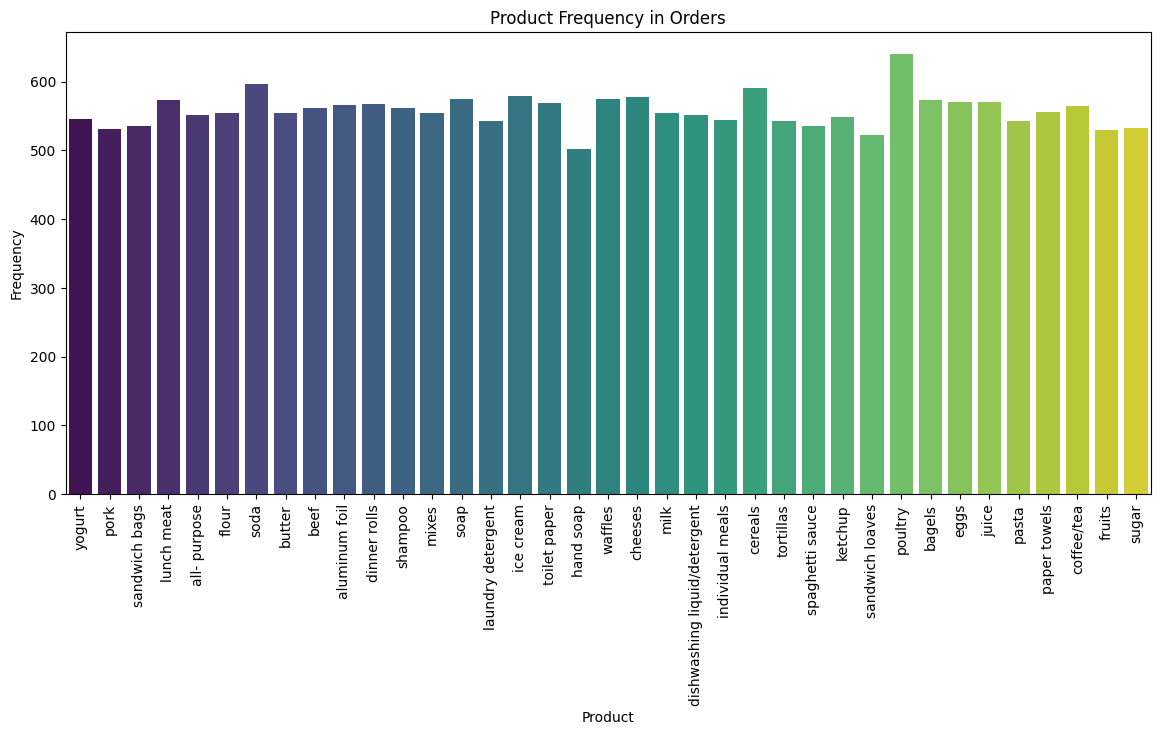

In [17]:
#2: Count Plot
# Visualizing the frequency of each product across orders
plt.figure(figsize=(14, 6))
sns.countplot(data=data, x='Product', palette='viridis')
plt.title('Product Frequency in Orders')
plt.xlabel('Product')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()


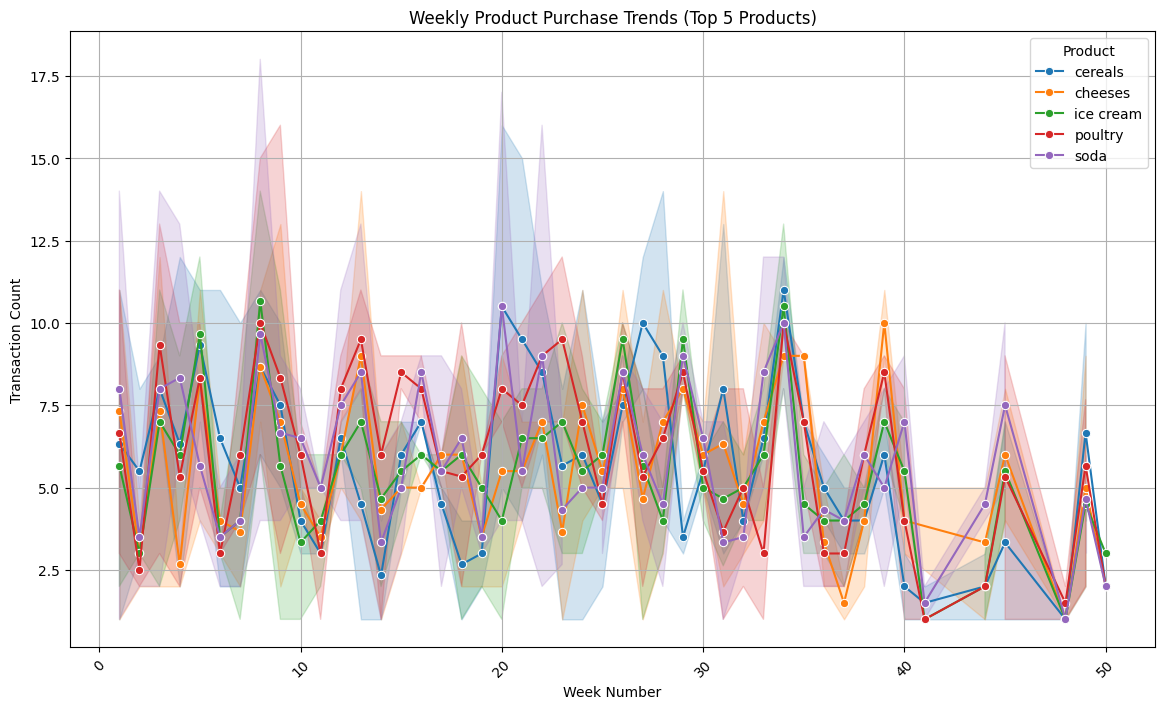

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
data = pd.read_csv('C:\\Users\\GNANASEKARAN\\OneDrive\\Documents\\Python Project\\dataset_group.csv')

# Ensure 'Date' column is in datetime format (adjust 'Date' if the column name is different)
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

# Drop rows with invalid dates
data.dropna(subset=['Date'], inplace=True)

# Extract the Week number (ISO week) and Year from the 'Date' column
data['Week'] = data['Date'].dt.isocalendar().week
data['Year'] = data['Date'].dt.year

# Group by 'Year', 'Week', and 'Product' to get the transaction counts per product per week
weekly_trends = data.groupby(['Year', 'Week', 'Product']).size().reset_index(name='Transaction_Count')

# Select top 5 products based on frequency for visualization
top_products = data['Product'].value_counts().head(5).index

# Filter the weekly trends to include only the top 5 products
weekly_trends_top = weekly_trends[weekly_trends['Product'].isin(top_products)]

# Plotting the Weekly Trends for the top 5 products
plt.figure(figsize=(14, 8))
sns.lineplot(data=weekly_trends_top, x='Week', y='Transaction_Count', hue='Product', marker="o")
plt.title('Weekly Product Purchase Trends (Top 5 Products)')
plt.xlabel('Week Number')
plt.ylabel('Transaction Count')
plt.xticks(rotation=45)
plt.legend(title='Product')
plt.grid(True)
plt.show()


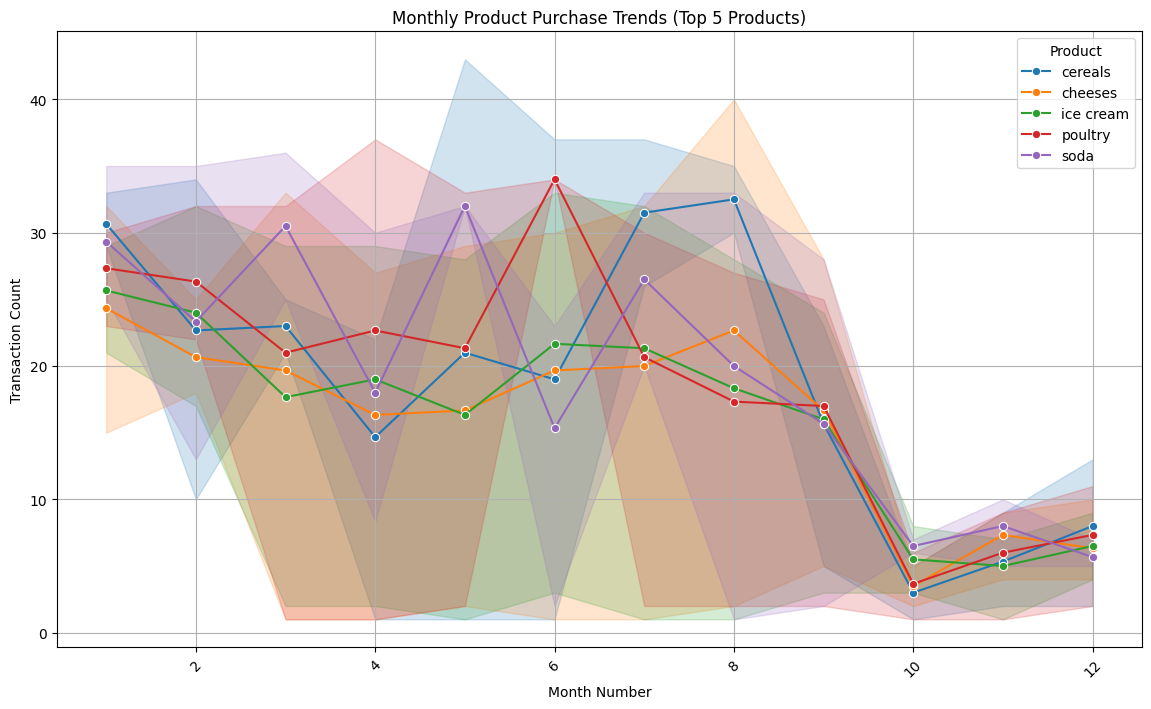

In [19]:
# Group by 'Year', 'Month', and 'Product' to get the transaction counts per product per month
data['Month'] = data['Date'].dt.month  # Extract the month number (1-12)

# Grouping by 'Year', 'Month', and 'Product' for transaction count
monthly_trends = data.groupby(['Year', 'Month', 'Product']).size().reset_index(name='Transaction_Count')

# Select top 5 products based on frequency for visualization
monthly_trends_top = monthly_trends[monthly_trends['Product'].isin(top_products)]

# Plotting the Monthly Trends for the top 5 products
plt.figure(figsize=(14, 8))
sns.lineplot(data=monthly_trends_top, x='Month', y='Transaction_Count', hue='Product', marker="o")
plt.title('Monthly Product Purchase Trends (Top 5 Products)')
plt.xlabel('Month Number')
plt.ylabel('Transaction Count')
plt.xticks(rotation=45)
plt.legend(title='Product')
plt.grid(True)
plt.show()


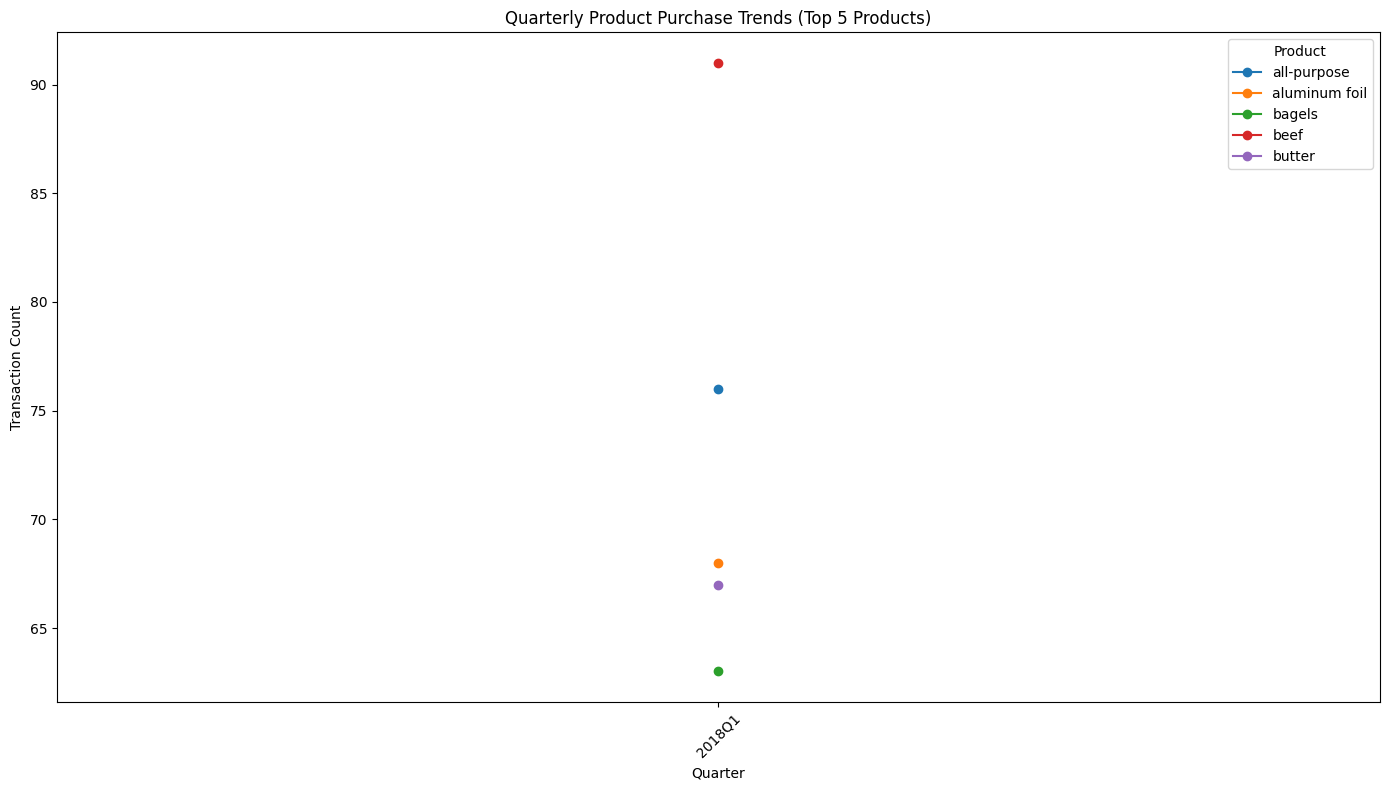

In [20]:
#quarterly trend
# Sample data
data = {
    'Quarter': ['2018Q1', '2018Q1', '2018Q1', '2018Q1', '2018Q1'],
    'Product': ['all-purpose', 'aluminum foil', 'bagels', 'beef', 'butter'],
    'Transaction_Count': [76, 68, 63, 91, 67]
}

quarterly_trends = pd.DataFrame(data)

# Ensure 'Transaction_Count' is numeric (if it's not already)
quarterly_trends['Transaction_Count'] = pd.to_numeric(quarterly_trends['Transaction_Count'], errors='coerce')

# Plotting using matplotlib directly
plt.figure(figsize=(14, 8))

# Loop through each product and plot the line for each one
for product in quarterly_trends['Product'].unique():
    product_data = quarterly_trends[quarterly_trends['Product'] == product]
    plt.plot(product_data['Quarter'], product_data['Transaction_Count'], marker="o", label=product)

# Title and labels
plt.title('Quarterly Product Purchase Trends (Top 5 Products)')
plt.xlabel('Quarter')
plt.ylabel('Transaction Count')

# Rotate x-axis labels
plt.xticks(rotation=45)

# Add legend
plt.legend(title='Product')

# Show plot
plt.tight_layout()  # Adjust layout to avoid overlap
plt.show()


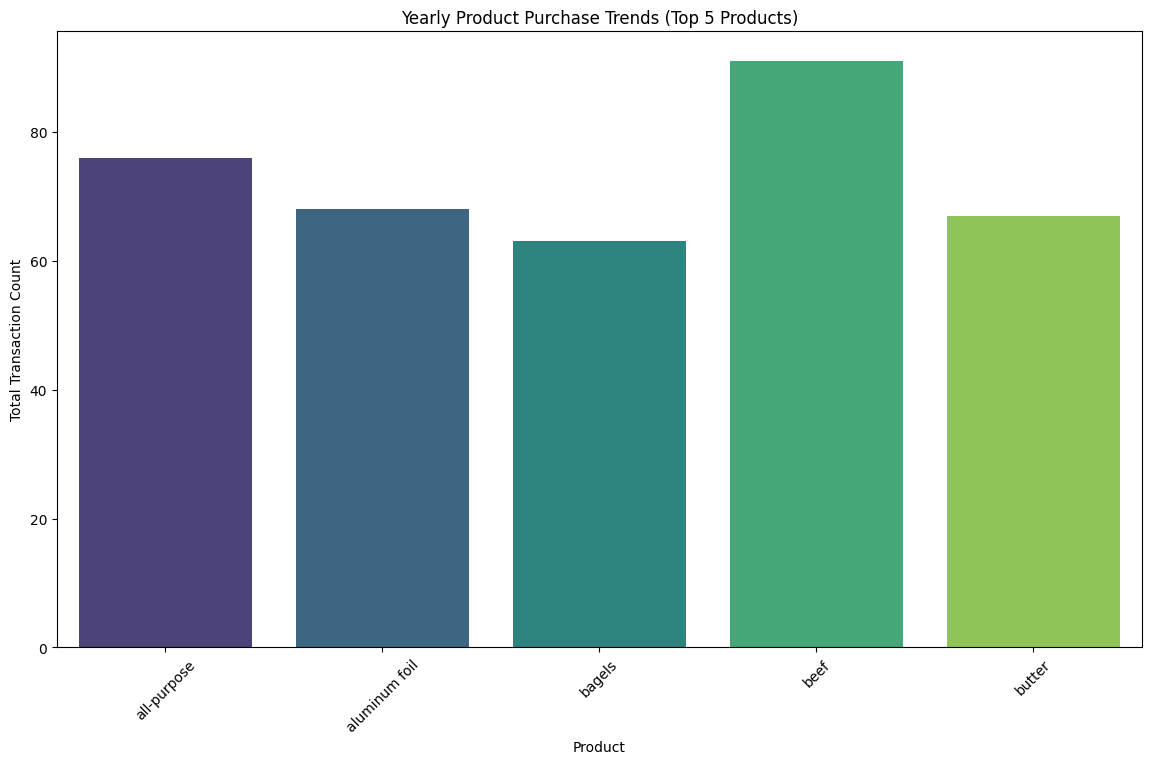

In [21]:
# Check if 'data' is a dictionary and convert it to a DataFrame if needed
if isinstance(data, dict):
    data = pd.DataFrame(data)

# Manually create a simple aggregation of Transaction_Count per product
yearly_trends = data.groupby(['Product']).agg({'Transaction_Count': 'sum'}).reset_index()

# Filter out the top 5 products
top_products = ['all-purpose', 'aluminum foil', 'bagels', 'beef', 'butter']  # Replace with your top 5 products
yearly_trends_top = yearly_trends[yearly_trends['Product'].isin(top_products)]

# Step 2: Plot the data
plt.figure(figsize=(14, 8))
sns.barplot(x='Product', y='Transaction_Count', data=yearly_trends_top, palette="viridis")
plt.title('Yearly Product Purchase Trends (Top 5 Products)')
plt.xlabel('Product')
plt.ylabel('Total Transaction Count')
plt.xticks(rotation=45)
plt.show()
